# Load CIFAR-10 Data

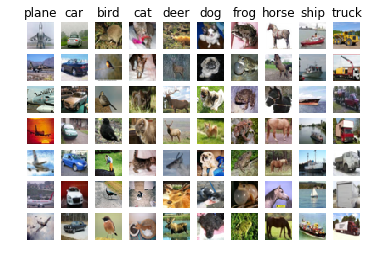

Train data shape:(9794, 3073),
Train labels shape:(9794,), 
Validation data shape:(206, 3073),
Validation labels shape:(206,),
Test data shape:(2000, 3073),
Test labels shape:(2000,),


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  with open(filename, 'r') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
  """ load all of cifar """
  xs = []
  ys = []
  for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
  return Xtr, Ytr, Xte, Yte
from algorithms.data_utils import load_CIFAR10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def get_CIFAR10_data(num_training=49000, num_val=1000, num_test=10000, show_sample=True):
    """
    Load the CIFAR-10 dataset, and divide the sample into training set, validation set and test set
    """

    cifar10_dir = 'cifar-10-batches-py/'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # subsample the data for validation set
    mask = range(num_training, num_training + num_val)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    return X_train, y_train, X_val, y_val, X_test, y_test

def subset_classes_data(classes):
    # Subset 'plane' and 'car' classes to perform logistic regression
    idxs = np.logical_or(y_train_raw == 0, y_train_raw == 1)
    X_train = X_train_raw[idxs, :]
    y_train = y_train_raw[idxs]
    # validation set
    idxs = np.logical_or(y_val_raw == 0, y_val_raw == 1)
    X_val = X_val_raw[idxs, :]
    y_val = y_val_raw[idxs]
    # test set
    idxs = np.logical_or(y_test_raw == 0, y_test_raw == 1)
    X_test = X_test_raw[idxs, :]
    y_test = y_test_raw[idxs]
    return X_train, y_train, X_val, y_val, X_test, y_test

def visualize_sample(X_train, y_train, classes, samples_per_class=7):
    """visualize some samples in the training datasets """
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    
def preprocessing_CIFAR10_data(X_train, y_train, X_val, y_val, X_test, y_test):
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1)) # [49000, 3072]
    X_val = np.reshape(X_val, (X_val.shape[0], -1)) # [1000, 3072]
    X_test = np.reshape(X_test, (X_test.shape[0], -1)) # [10000, 3072]
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    #X_train -= mean_image
    #X_val -= mean_image
    #X_test -= mean_image
    
    # Add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above functions to get our data
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = get_CIFAR10_data()
visualize_sample(X_train_raw, y_train_raw, classes)
subset_classes = ['plane', 'cat']
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = subset_classes_data(subset_classes)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessing_CIFAR10_data(X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw)

# As a sanity check, we print out th size of the training and test data dimenstion
print ("Train data shape:{},".format(X_train.shape))
print ("Train labels shape:{}, ".format(y_train.shape))
print ("Validation data shape:{},".format(X_val.shape))
print ("Validation labels shape:{},".format(y_val.shape))
print ("Test data shape:{},".format(X_test.shape))
print ("Test labels shape:{},".format(y_test.shape))

# Logistic Regression with Keras

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
#sgd = optimizers.SGD(lr=1e-5)
model.compile(optimizer='sgd', loss='binary_crossentropy')

# Experiments - Convergence

Batch size=16
Data Replication Factor = 1
(9794, 3073)
Epoch 1/10
9794/9794 [==============================] - 5s 485us/step - loss: 7.9985
Epoch 2/10
9794/9794 [==============================] - 2s 208us/step - loss: 7.9972
Epoch 3/10
9794/9794 [==============================] - 2s 160us/step - loss: 7.9972
Epoch 4/10
9794/9794 [==============================] - 1s 146us/step - loss: 7.9972
Epoch 5/10
9794/9794 [==============================] - 1s 140us/step - loss: 7.9972
Epoch 6/10
9794/9794 [==============================] - 1s 143us/step - loss: 7.9972
Epoch 7/10
9794/9794 [==============================] - 1s 133us/step - loss: 7.9972
Epoch 8/10
9794/9794 [==============================] - 1s 142us/step - loss: 7.9972
Epoch 9/10
9794/9794 [==============================] - 2s 193us/step - loss: 7.9972
Epoch 10/10
9794/9794 [==============================] - 2s 198us/step - loss: 7.9972
[ 727   22 2357 ... 8109 7000 5020]
Batch size=16
Data Replication Factor = 2
(9794, 3073)
Epo

9794/9794 [==============================] - 0s 24us/step - loss: 7.9972
Epoch 9/10
9794/9794 [==============================] - 0s 23us/step - loss: 7.9972
Epoch 10/10
9794/9794 [==============================] - 0s 24us/step - loss: 7.9972
[6996 8975 5432 ... 3095 2014 1489]
Batch size=256
Data Replication Factor = 2
(9794, 3073)
Epoch 1/10
9794/9794 [==============================] - 4s 401us/step - loss: 7.6812
Epoch 2/10
9794/9794 [==============================] - 0s 25us/step - loss: 8.2417
Epoch 3/10
9794/9794 [==============================] - 0s 31us/step - loss: 8.2417
Epoch 4/10
9794/9794 [==============================] - 0s 24us/step - loss: 8.2417
Epoch 5/10
9794/9794 [==============================] - 0s 24us/step - loss: 8.2417
Epoch 6/10
9794/9794 [==============================] - 0s 24us/step - loss: 8.2417
Epoch 7/10
9794/9794 [==============================] - 0s 24us/step - loss: 8.2417
Epoch 8/10
9794/9794 [==============================] - 0s 24us/step - loss: 

9794/9794 [==============================] - 0s 21us/step - loss: 7.9338
Epoch 7/10
9794/9794 [==============================] - 0s 21us/step - loss: 7.9338
Epoch 8/10
9794/9794 [==============================] - 0s 21us/step - loss: 7.9338
Epoch 9/10
9794/9794 [==============================] - 0s 21us/step - loss: 7.9338
Epoch 10/10
9794/9794 [==============================] - 0s 20us/step - loss: 7.9338
[5601 2129 6169 ... 2090 4314  395]
Batch size=512
Data Replication Factor = 3
(9792, 3073)
Epoch 1/10
9792/9792 [==============================] - 4s 405us/step - loss: 8.0679
Epoch 2/10
9792/9792 [==============================] - 0s 20us/step - loss: 8.0689
Epoch 3/10
9792/9792 [==============================] - 0s 19us/step - loss: 8.0689
Epoch 4/10
9792/9792 [==============================] - 0s 15us/step - loss: 8.0689
Epoch 5/10
9792/9792 [==============================] - 0s 21us/step - loss: 8.0689
Epoch 6/10
9792/9792 [==============================] - 0s 20us/step - loss: 

9792/9792 [==============================] - 0s 18us/step - loss: 7.9455
Epoch 5/10
9792/9792 [==============================] - 0s 18us/step - loss: 7.9455
Epoch 6/10
9792/9792 [==============================] - 0s 19us/step - loss: 7.9455
Epoch 7/10
9792/9792 [==============================] - 0s 19us/step - loss: 7.9455
Epoch 8/10
9792/9792 [==============================] - 0s 19us/step - loss: 7.9455
Epoch 9/10
9792/9792 [==============================] - 0s 19us/step - loss: 7.9455
Epoch 10/10
9792/9792 [==============================] - 0s 18us/step - loss: 7.9455
[5838 6740 2752 ... 5511 6082 1177]
Batch size=768
Data Replication Factor = 4
(9792, 3073)
Epoch 1/10
9792/9792 [==============================] - 4s 425us/step - loss: 7.7666
Epoch 2/10
9792/9792 [==============================] - 0s 18us/step - loss: 7.7239
Epoch 3/10
9792/9792 [==============================] - 0s 18us/step - loss: 7.7239
Epoch 4/10
9792/9792 [==============================] - 0s 19us/step - loss: 

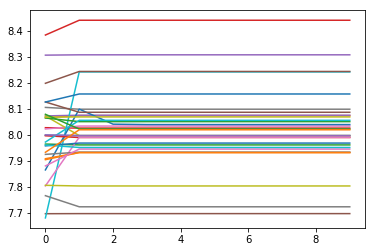

In [114]:
def data_replication(X,y,r):
    if r==1:
        return X,y
    idx = np.random.choice(X.shape[0], int(X.shape[0]/r),replace=False)
    print(idx)
    X = np.tile(X[idx,:], (r,1))
    y = np.tile(y[idx],r)
    return X,y
loss_mtx=[]
for batch_size in [16,256,512,768]:
    loss=[]
    for r in range(1,9):
        X_train_r,y_train_r = data_replication(X_train,y_train,r)
        print("Batch size={}".format(batch_size))
        print("Data Replication Factor = {}".format(r))
        print(X_train_r.shape)
        model = Sequential()
        model.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
        #sgd = optimizers.SGD(lr=1e-5)
        model.compile(optimizer='sgd', loss='binary_crossentropy')
        history = model.fit(X_train_r, y_train_r, epochs = 10, batch_size = batch_size)
        loss.append(np.average(history.history['loss']))
        plt.plot(history.history['loss'])
    loss_mtx.append(loss.copy())

In [115]:
loss_rate=np.array(loss_mtx)/np.array(loss_mtx[0])

In [116]:
loss_rate

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.00092694, 1.01393534, 1.00835135, 0.9879284 , 0.99714838,
        1.03805638, 1.03417127, 1.01723946],
       [0.99683696, 0.98263219, 1.01344299, 1.00264587, 0.98664904,
        1.0301544 , 0.99942487, 1.04138243],
       [1.00001594, 1.00218175, 0.99714258, 0.96285495, 0.96642482,
        1.03311868, 1.01508219, 0.98909391]])

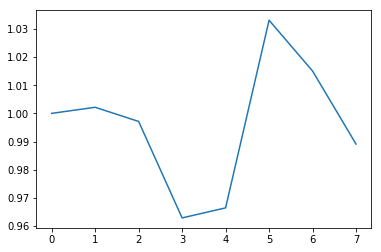

In [117]:
plt.plot(loss_rate[3])

In [106]:
X_train_r,y_train_r = data_replication(X_train,y_train,r)

In [111]:
idx = np.random.choice(X_train.shape[0], int(X_train.shape[0]/r),replace=False)

In [112]:
idx.shape

(1224,)

In [113]:
idx


array([5529, 6697, 7034, ...,  323, 7619, 6955])